# Classification Modeling on Adult Income Dataset

## Import and Explore the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('adult_income.csv')

In [4]:
# Find the first 20 rows of the dataset
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
# Find the number of rows and columns in the dataset
df.shape

(48842, 15)

In [6]:
# Find missing values
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,2809
relationship,0
race,0
sex,0


## Handle Missing Values

In [ ]:
# Filling missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Filling missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

## Check for Outliers

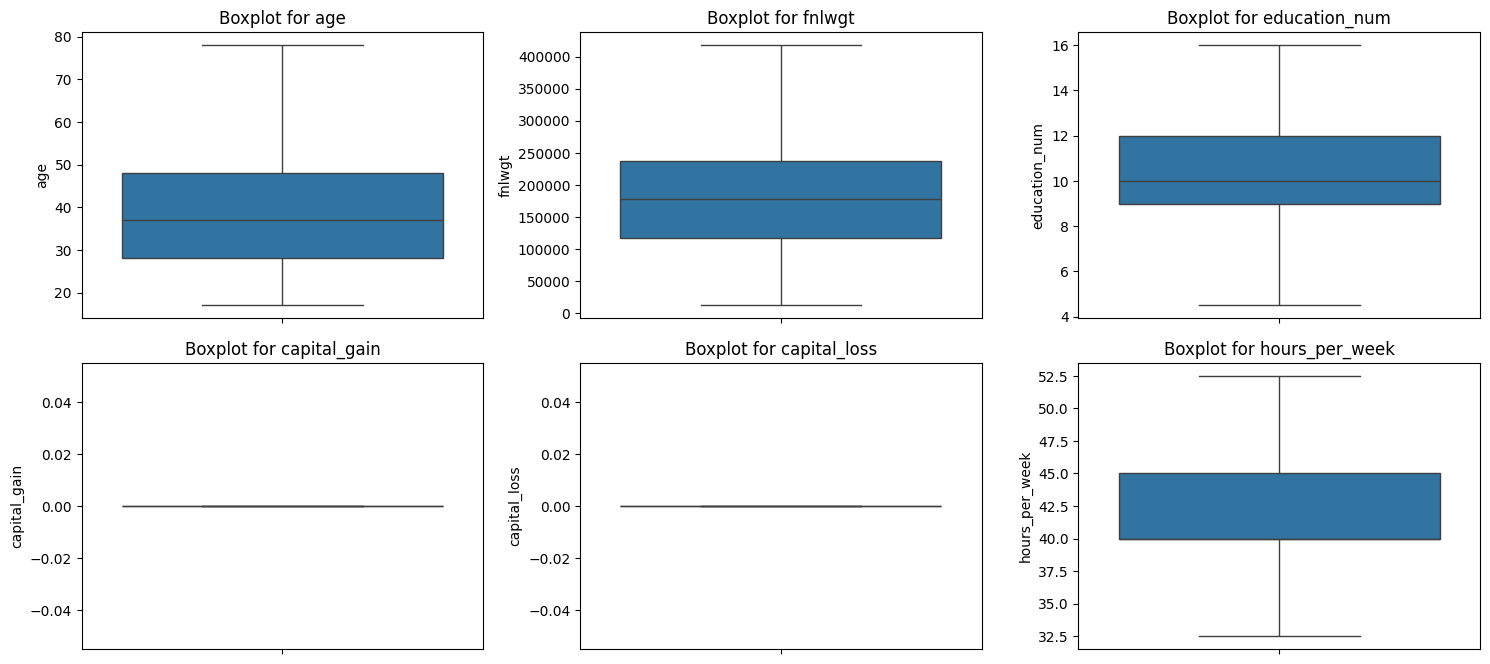

In [10]:
# Visualizing outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [11]:
# Handling outliers by capping values
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

## Visualize Data Distribution

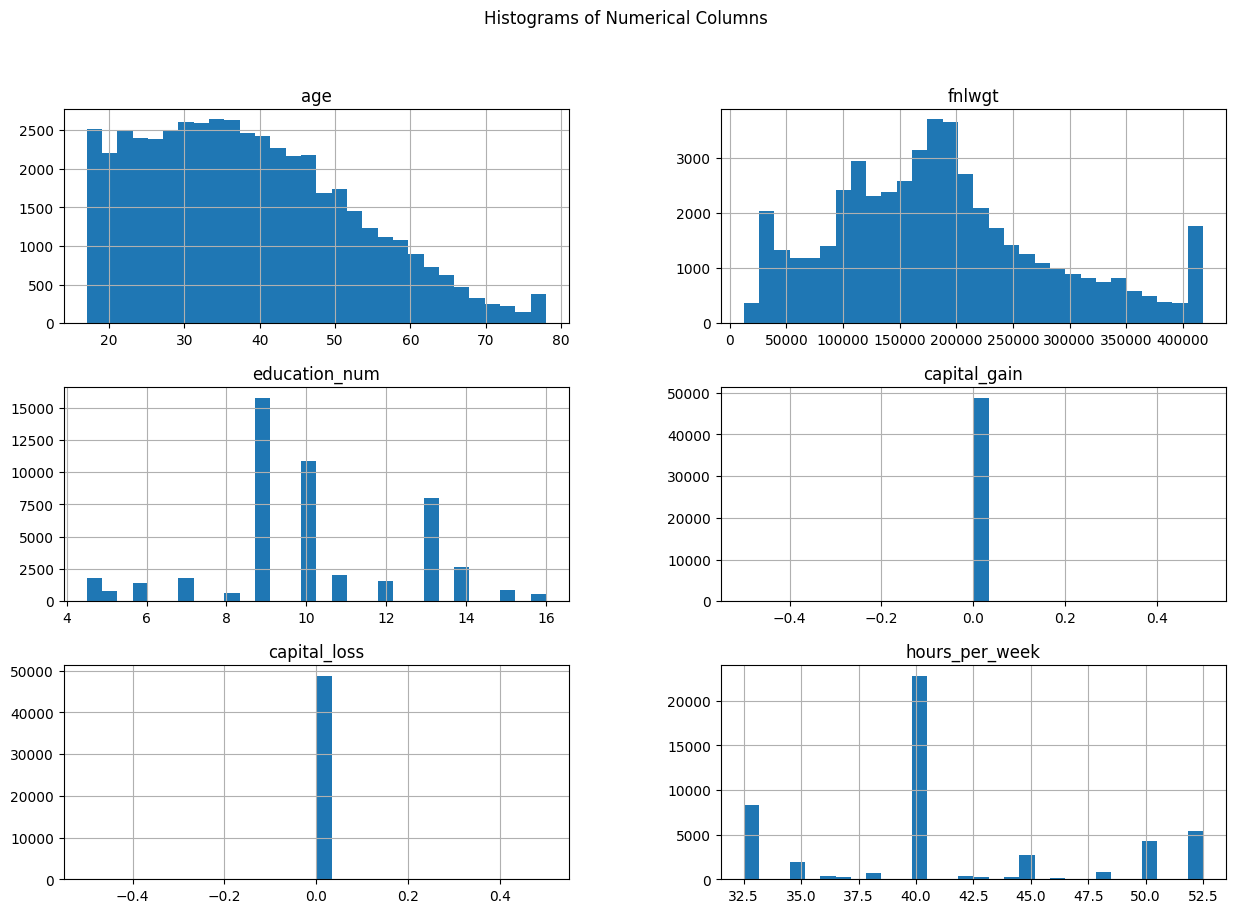

In [12]:
# Plot histograms for numerical columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

## Categorical Encoding

In [13]:
# One Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Correlation Matrix

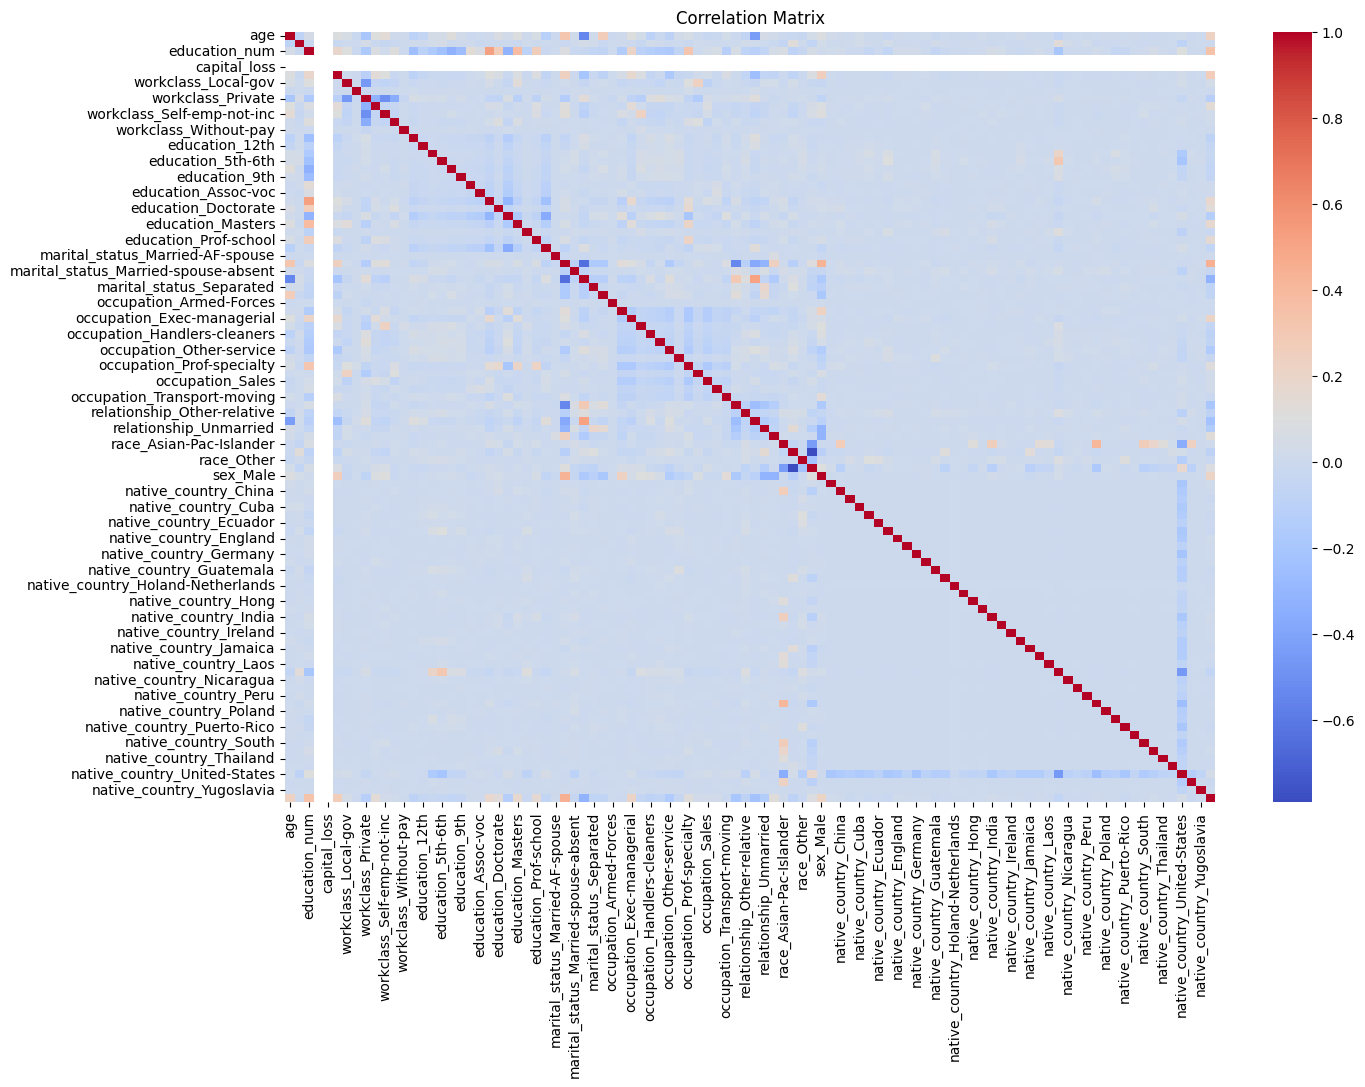

Top 3 features correlated with Income: ['marital_status_Married-civ-spouse', 'education_num', 'hours_per_week']


In [14]:
# Compute and visualize correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify top 3 features correlated with the target variable (Income)
correlated_features = correlation_matrix['income_>50K'].sort_values(ascending=False)[1:4]
print("Top 3 features correlated with Income:", correlated_features.index.tolist())

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Initialize scaler and apply it
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Scaled numerical features:")
print(df[numerical_cols].head())


Scaled numerical features:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.027984 -1.146097       1.171374           0.0           0.0   
1  0.835015 -1.085307       1.171374           0.0           0.0   
2 -0.045382  0.302906      -0.456714           0.0           0.0   
3  1.055114  0.503005      -1.270758           0.0           0.0   
4 -0.779046  1.590706       1.171374           0.0           0.0   

   hours_per_week  
0       -0.192863  
1       -1.405526  
2       -0.192863  
3       -0.192863  
4       -0.192863  


## Model building and evaluation

In [16]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (34189, 97)
Test data shape: (14653, 97)


Training Logistic Regression...
Confusion Matrix for Logistic Regression:
[[10276   833]
 [ 1621  1923]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.86      0.93      0.89     11109
        True       0.70      0.54      0.61      3544

    accuracy                           0.83     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.82      0.83      0.82     14653

Accuracy for Logistic Regression: 0.83
Training KNN...
Confusion Matrix for KNN:
[[9920 1189]
 [1465 2079]]
Classification Report for KNN:
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11109
        True       0.64      0.59      0.61      3544

    accuracy                           0.82     14653
   macro avg       0.75      0.74      0.75     14653
weighted avg       0.81      0.82      0.82     14653

Accuracy for KNN: 0.82
Training Decision Tree...
Confus

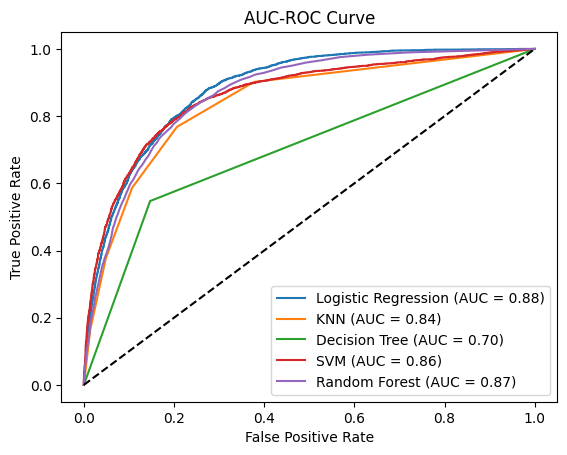

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.2f}")

    # Plot AUC-ROC curve
    if y_pred_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

- Logistic Regression
    - Accuracy: 83%
    - Precision and recall for the minority class (True): 70% and 54%

- KNN
    - Accuracy: 82%
    - Precision and recall for the minority class: 64% and 59%

- Decision Tree
    - Accuracy: 78%
    - Precision and recall for the minority class: 54% and 55%

- SVM
    - Accuracy: 84%
    - Precision and recall for the minority class: 73% and 54%

- Random Forest
    - Accuracy: 82%
    - Precision and recall for the minority class: 66% and 56%

- **Overall:** Before resolving class imbalance, Logistic Regression and SVM showed the best results in accuracy, but low recall presents challenges for proper identification of minority classes.

## Addressing class imbalances using SMOTE

Resampled training data shape: (52092, 97)
Training Logistic Regression with balanced data...
Confusion Matrix for Logistic Regression (Balanced):
[[8795 2314]
 [ 779 2765]]
Classification Report for Logistic Regression (Balanced):
              precision    recall  f1-score   support

       False       0.92      0.79      0.85     11109
        True       0.54      0.78      0.64      3544

    accuracy                           0.79     14653
   macro avg       0.73      0.79      0.75     14653
weighted avg       0.83      0.79      0.80     14653

Accuracy for Logistic Regression (Balanced): 0.79
Training KNN with balanced data...
Confusion Matrix for KNN (Balanced):
[[8836 2273]
 [ 894 2650]]
Classification Report for KNN (Balanced):
              precision    recall  f1-score   support

       False       0.91      0.80      0.85     11109
        True       0.54      0.75      0.63      3544

    accuracy                           0.78     14653
   macro avg       0.72      0.7

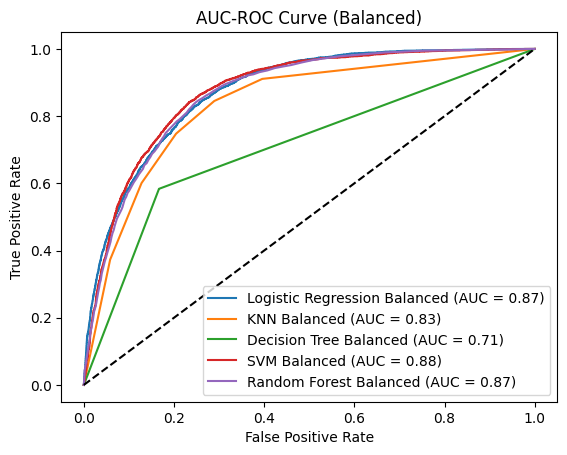

In [19]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled training data shape: {X_resampled.shape}")

# Re-train models with balanced data
for name, model in models.items():
    print(f"Training {name} with balanced data...")
    model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    print(f"Confusion Matrix for {name} (Balanced):")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {name} (Balanced):")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy for {name} (Balanced): {accuracy_score(y_test, y_pred):.2f}")

    # Plot AUC-ROC curve
    if y_pred_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} Balanced (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Balanced)')
plt.legend()
plt.show()


- Logistic Regression (Balanced):
    - Accuracy: 79%
    - Precision and recall for the minority class: 54% and 78%

- KNN (Balanced)
    - Accuracy: 78%
    - Precision and recall for the minority class: 54% and 75%

- Decision Tree (Balanced)
    - Accuracy: 77%
    - Precision and recall for the minority class: 53% and 58%

- SVM (Balanced)
    - Accuracy: 79%
    - Precision and recall for the minority class: 55% and 81%

- Random Forest (Balanced)
    - Accuracy: 81%
    - Precision and recall for the minority class: 61% and 65%

- **Overall**: After eliminating the class imbalance, recall improved for all models and the ability to identify the minority class (True) improved significantly. In particular, Random Forest and SVM showed optimal results in balancing Precision and Recall for the minority class.

## Conclusion

- **Before eliminating class imbalance:** SVM shows the highest accuracy and is the model of choice with the highest Precision.
- **After class imbalance elimination:** Random Forest has the best balance between Precision and Recall and is most suitable for identifying small classes.